In [1]:
import os
import librosa as lb
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import pandas as pd
import statistics
from statistics import mode
import speech_recognition as sr

In [2]:
directory='recordings2'

mfccarray=[]
for filename in os.listdir(directory):
    audio_file=directory+'/'+filename
    x,fs = lb.load(audio_file,sr=20000)
    #print(1)
    #Extracting MFCCs
    mfccs=librosa.feature.mfcc(x,n_mfcc=13,sr=fs,hop_length=int(0.010*fs),n_fft=int(0.02*fs))
    delta_mfcc=librosa.feature.delta(mfccs)
    delta2_mfcc=librosa.feature.delta(mfccs,order=2)
    comprehensive_mfcc=np.concatenate((mfccs,delta_mfcc,delta2_mfcc))
    mfccarray.append(comprehensive_mfcc.T)
    

    
    
    

In [3]:
print(len(mfccarray))

500


In [4]:
array_y=[]
for i in range(10):
    a=[i]*50
    array_y=array_y+a
print(len(array_y))

500


In [5]:
print(mfccarray[1].shape)

(60, 39)


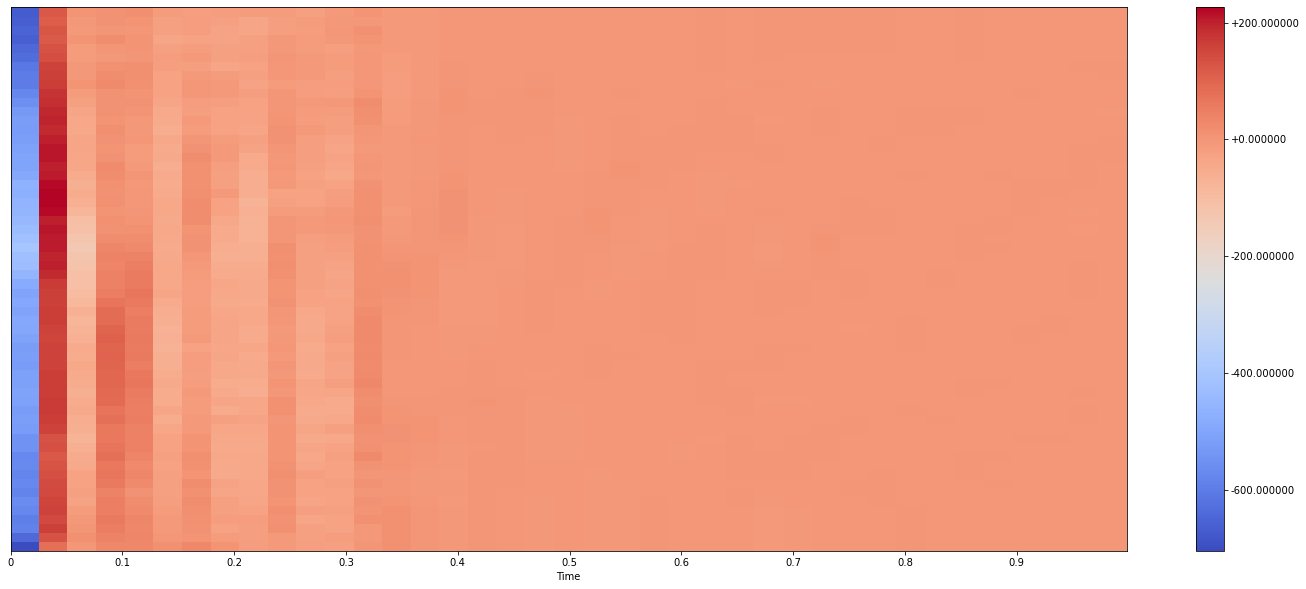

In [6]:
#MFCC plot of a frame
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccarray[1],x_axis="time",sr=fs)
plt.colorbar(format="%+2f")
plt.show()


In [7]:
# Function to calculate Dynamic time warping distance

from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def distance(x,y):

    d, path = fastdtw(x,y, dist=euclidean)
    return d

#print(distance)
#print(path)

In [8]:
#Splitting tran and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(mfccarray,array_y,test_size=0.3,random_state=5)

In [9]:
# Algorithm for KNN
def knn(k,digit):
    dict_index={}
    ind_list=list(range(350))
    DTW_list=[]
    for i in xtrain:
        DTW_list.append(distance(digit,i))
    for i in range(len(ind_list)):
        #print(1)
        dict_index[DTW_list[i]]=ind_list[i]
    key_list=list(dict_index.keys())
    key_list.sort()
    k_key_list=key_list[0:k]
    y_index=[]
    for i in k_key_list:
        y_index.append(dict_index[i])
    y_list=[]
    for i in y_index:
        y_list.append(ytrain[i])
    digit_utter=mode(y_list)
    
    return digit_utter
    
    
    
        
    

In [10]:
#Distnce matrix for testing performance

dist_mat=np.empty((150,350))
#print(dist_mat.shape)
for i in range(len(xtest)):
    for j in range(len(xtrain)):
        dist_mat[i][j]=distance(xtest[i],xtrain[j])




In [11]:
l11=dist_mat[1][:]
l11.shape

(350,)

In [10]:
# function to find accuracy
def accuracy(k):
    y_pre=[]
    
    for i in range(len(xtest)):
        dict1={}
        for j in range(len(xtrain)):
            dict1[dist_mat[i][j]]=ytrain[j]
        l1=list(dict1.keys())
        l1.sort()
        l2=l1[0:k]
        l3_val=[]
        for j in l2:
            l3_val.append(dict1[j])
        val=mode(l3_val)
        y_pre.append(val)
            
    count=0
    for i in range(len(xtest)):
        if y_pre[i]==ytest[i]:
            count+=1
    return count/len(xtest)

[0.9266666666666666, 0.8933333333333333, 0.8733333333333333, 0.8466666666666667]


Text(0, 0.5, 'Accuracy score')

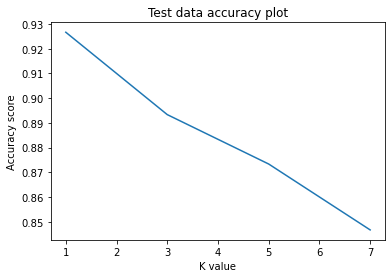

In [22]:
#finding k
k_range=[1,3,5,7]
accuracy_list=[]

for i in k_range:
    #print(i)
    accuracy_list.append(accuracy(i))
print(accuracy_list)
    
plt.plot(k_range,accuracy_list)
plt.title("Test data accuracy plot")
plt.xlabel("K value")
plt.ylabel("Accuracy score")
    

In [14]:
#find performance using other speakers voice

def accuracy_o(k):
    y_pre=[]
    
    for i in range(len(xtest_o)):
        dict1={}
        for j in range(len(xtrain)):
            dict1[dist_mat_o[i][j]]=ytrain[j]
        l1=list(dict1.keys())
        l1.sort()
        l2=l1[0:k]
        l3_val=[]
        for j in l2:
            l3_val.append(dict1[j])
        val=mode(l3_val)
        y_pre.append(val)
            
    count=0
    for i in range(len(xtest_o)):
        if y_pre[i]==ytest_o[i]:
            count+=1
    #print(y_pre)
    return count/len(xtest_o)
    

In [15]:
directory_o='Otherspeakers'

xtest_o=[]
for filename in os.listdir(directory_o):
    audio_file_o=directory_o+'/'+filename
    x_o,fs_o = lb.load(audio_file_o,sr=16000)
    #print(1)
    #Extracting MFCCs
    mfccs_o=librosa.feature.mfcc(x_o,n_mfcc=13,sr=fs_o,hop_length=int(0.010*fs_o),n_fft=int(0.02*fs_o))
    delta_mfcc_o=librosa.feature.delta(mfccs_o)
    delta2_mfcc_o=librosa.feature.delta(mfccs_o,order=2)
    comprehensive_mfcc_o=np.concatenate((mfccs_o,delta_mfcc_o,delta2_mfcc_o))
    xtest_o.append(comprehensive_mfcc_o.T)
print(len(xtest_o))
    

150


In [16]:
ytest_o=[]
for i in range(10):
    a=[i]*15
    ytest_o=ytest_o+a
print(len(ytest_o))

150


In [18]:
#Distnce matrix for others testing performance

dist_mat_o=np.empty((150,350))
#print(dist_mat.shape)
for i in range(len(xtest_o)):
    for j in range(len(xtrain)):
        dist_mat_o[i][j]=distance(xtest_o[i],xtrain[j])

[0.6266666666666667, 0.6066666666666667, 0.62, 0.5866666666666667]


Text(0.5, 0, 'K value')

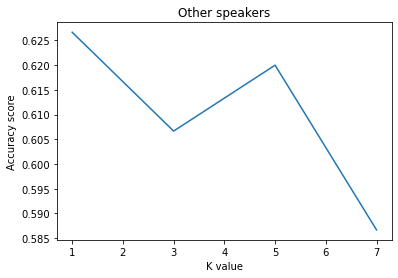

In [21]:
#finding k
k_range_o=[1,3,5,7]
accuracy_list_o=[]

for i in k_range_o:
    #print(i)
    accuracy_list_o.append(accuracy_o(i))
print(accuracy_list_o)
    
plt.plot(k_range_o,accuracy_list_o)
plt.title("Other speakers")
plt.ylabel("Accuracy score")
plt.xlabel("K value")

In [11]:
#Main program
def system_design():
    r=sr.Recognizer()
    mic1=sr.Microphone(device_index=1)
    with mic1 as source:
        print("speak a digit")
        r.adjust_for_ambient_noise(source)
        a=r.listen(source,timeout=None)
        print("processing")
    
        with open('speech.wav','wb') as f:
            f.write(a.get_wav_data())
    
    audio_input='speech.wav'
    xi,fsi=lb.load(audio_input,sr=20000)
    mfccsi=librosa.feature.mfcc(xi,n_mfcc=13,sr=fsi,hop_length=int(0.010*fsi),n_fft=int(0.02*fsi))
    delta_mfcci=librosa.feature.delta(mfccsi)
    delta2_mfcci=librosa.feature.delta(mfccsi,order=2)
    comprehensive_mfcci=np.concatenate((mfccsi,delta_mfcci,delta2_mfcci))
    comp_input=comprehensive_mfcci.T
    os.remove("speech.wav")
    #print(1)
    dig=knn(1,comp_input)


    if dig==0:
        print("The digit uttered is zero 0")
    elif dig==1:
        print("The digit uttered is one 1")
    elif dig==2:
        print("The digit uttered is two 2")
    elif dig==3:
        print("The digit uttered is three 3")
    elif dig==4:
        print("The digit uttered is four 4")
    elif dig==5:
        print("The digit uttered is five 5")
    elif dig==6:
        print("The digit uttered is six 6")
    elif dig==7:
        print("The digit uttered is seven 7")
    elif dig==8:
        print("The digit uttered is eight 8")
    elif dig==9:
        print("The digit uttered is nine 9")


In [13]:
directory_o1="MYvoicedigits/new1"
for filename in os.listdir(directory_o1):
    print(filename)
    audio_input1=directory_o1+'/'+filename
    xi1,fsi1=lb.load(audio_input1,sr=20000)
    mfccsi1=librosa.feature.mfcc(xi1,n_mfcc=13,sr=fsi1,hop_length=int(0.010*fsi1),n_fft=int(0.02*fsi1))
    delta_mfcci1=librosa.feature.delta(mfccsi1)
    delta2_mfcci1=librosa.feature.delta(mfccsi1,order=2)
    comprehensive_mfcci1=np.concatenate((mfccsi1,delta_mfcci1,delta2_mfcci1))
    comp_input1=comprehensive_mfcci1.T
    dig1=knn(1,comp_input1)


    if dig1==0:
        print("The digit uttered is zero 0")
    elif dig1==1:
        print("The digit uttered is one 1")
    elif dig1==2:
        print("The digit uttered is two 2")
    elif dig1==3:
        print("The digit uttered is three 3")
    elif dig1==4:
        print("The digit uttered is four 4")
    elif dig1==5:
        print("The digit uttered is five 5")
    elif dig1==6:
        print("The digit uttered is six 6")
    elif dig1==7:
        print("The digit uttered is seven 7")
    elif dig1==8:
        print("The digit uttered is eight 8")
    elif dig1==9:
        print("The digit uttered is nine 9")


0_george_30.wav
The digit uttered is zero 0
1_george_30.wav
The digit uttered is five 5
2_george_30.wav
The digit uttered is two 2
3_george_30.wav
The digit uttered is three 3
4_george_30.wav
The digit uttered is four 4
5_george_30.wav
The digit uttered is five 5
6_george_30.wav
The digit uttered is three 3
7_george_30.wav
The digit uttered is five 5
8_george_30.wav
The digit uttered is three 3
9_george_30.wav
The digit uttered is five 5


In [16]:

# System design project
system_design()

speak a digit
processing
The digit uttered is six 6
